In [ ]:
"""

input = HBW,NHB,HBO (PA , OD) (12 output)
output = Desire line (12)

This processure is not time consuming! if I want to code as a professional I have to define Classes to read hit all in one shot!




"""

# Import libraries

In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import plotly.graph_objects as go


# Read Matrixes

In [2]:
Matrix = pd.read_excel('C:Desktop/New Microsoft Excel Worksheet (2).xlsx',skiprows=0) #for each matrix u have to import it
Matrix.drop(0,axis = 1,inplace = True)
Matrix.drop(0,axis = 0,inplace = True)
#I drop 0 indexes because of my shape files!

# Read shape Files

In [3]:
shapeFile = gpd.read_file('E:tehran_manategh/tehran.shp')

# Centroid Calculation

In [4]:
l=[]
t=[]
for i in range(1,23):
    for j in range (1,23):
       t.extend([i,j,Matrix.loc[i,j], shapeFile[shapeFile['manategh'] == i]['geometry'].centroid.y.iloc[0],shapeFile[shapeFile['manategh'] == i]['geometry'].centroid.x.iloc[0], shapeFile[shapeFile['manategh'] == j]['geometry'].centroid.y.iloc[0],shapeFile[shapeFile['manategh'] == j]['geometry'].centroid.x.iloc[0]])
       l.append(t)
       t=[]

# Outputs

In [5]:
Data = pd.DataFrame(l,columns=['OriginTract','DestTract','NoTrip','OLat','OLong','DLat','DLong'])
Data = Data[(Data.NoTrip != 0) & (Data.OriginTract != 0) & (Data.DestTract != 0)]


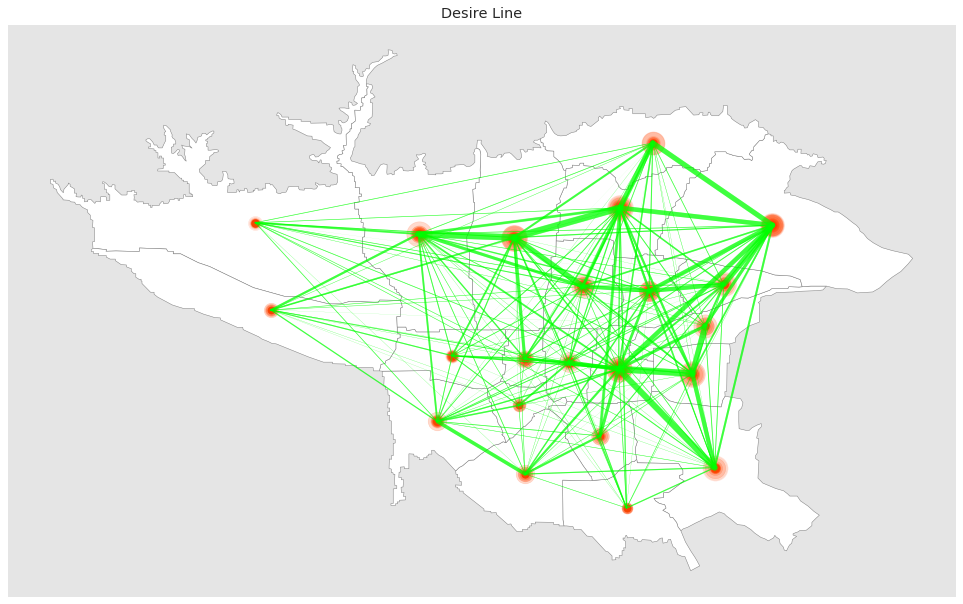

In [6]:
with plt.style.context(("seaborn", "ggplot")):
    shp = shapeFile.plot(figsize=(17,17), edgecolor="grey", color="white")
    shapeFile['geometry'].centroid.plot(ax=shp)
    for slat,dlat, slon, dlon, Ntrips in zip(Data["OLat"], Data["DLat"], Data["OLong"], Data["DLong"], Data["NoTrip"]):
        plt.plot([slon , dlon], [slat, dlat], linewidth=Ntrips/10000, color="lime", alpha=0.5)
        plt.scatter( [slon, dlon], [slat, dlat], color="orangered", alpha=0.1, s=Ntrips/100)
    plt.title('Desire Line') 
    plt.yticks([])
    plt.xticks([])